<a href="https://colab.research.google.com/github/devimaruthi/Projects/blob/main/Netflix_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
 
 
upload_data = files.upload()

Saving netflix1.csv to netflix1.csv


In [ ]:
# importing dependencies for EDA

import io
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
data = pd.read_csv(io.BytesIO(upload_data['netflix1.csv']))

## EXPLORATORY DATA ANALYSIS

In [ ]:
#viewing firsst five rows of the data

data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
# checking data types of the columns

data.dtypes 


show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

Obervation:: date_added should be date time data type not object

In [ ]:
#changing data type of the  feature  'data_added'

data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

In [ ]:
# checking the changes made in data types

data.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

Observation:: Date_added column data type has been changed to datetime data type

In [ ]:
data['country'].value_counts()

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

In [ ]:
#Extracting the day, year, month added from the date_added feature so that added and released years can be obtained along with day and month information

data['year_added'] = data['date_added'].dt.year
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021
...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2017
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,2018


Observation::  feature 'year_added' has been added at the end of the data frame

In [ ]:
# adding month added column

data['month_added'] = data['date_added'].dt.month_name()
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,September
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,September
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,September
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2017,January
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018,September
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016,December
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,2018,June


Observation:: feature month_added column has been added

In [ ]:
# adding day added column to the data

data['day_added'] = data['date_added'].dt.day_name()

data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September,Friday
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,September,Friday
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,September,Wednesday
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,September,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2017,January,Tuesday
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018,September,Thursday
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016,December,Thursday
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,2018,June,Saturday


Observation:: feature day_added has been added to the data frame

---



In [ ]:
#checking for null values

data.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
year_added      0
month_added     0
day_added       0
dtype: int64

Observation:: No Null values are observed in the data

In [ ]:
#checking for duplicates in the data set

data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8785    False
8786    False
8787    False
8788    False
8789    False
Length: 8790, dtype: bool

In [ ]:
data.drop_duplicates(subset = 'show_id', inplace = False)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September,Friday
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,September,Friday
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,September,Wednesday
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,September,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2017,January,Tuesday
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018,September,Thursday
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016,December,Thursday
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,2018,June,Saturday


In [ ]:
# getting size of the data

data.shape

(8790, 13)

In [ ]:
# getting information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
 10  year_added    8790 non-null   int64         
 11  month_added   8790 non-null   object        
 12  day_added     8790 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 892.9+ KB


In [ ]:
# getting statistical information about the data

data.describe(include = 'all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790,8790.000000,8790,8790
unique,8790,2,8787,4528,86,1713,NaN,14,220,513,NaN,12,7
top,s1,Movie,9-Feb,Not Given,United States,2020-01-01 00:00:00,NaN,TV-MA,1 Season,"Dramas, International Movies",NaN,July,Friday
freq,1,6126,2,2588,3240,110,NaN,3205,1791,362,NaN,827,2497
first,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,NaN,NaN,2018.873606,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.825466,NaN,NaN,NaN,1.573568,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,2008.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,2018.000000,NaN,NaN


observations::
1.The unique values of the type are two and  country that is in the top is united states.
  
2.14 categories of rated movies or TV shows are present in the data 

3.It seems like 12 months are present in data so netflix is active all around the year releasing TV shows or movies


In [ ]:
# types of films in netflix

grouping_type = data.groupby(data['type']) ['type'].count()
grouping_type

type
Movie      6126
TV Show    2664
Name: type, dtype: int64

observation: Two types of shows are available in netflix i.e movie and TV show. Movie records are more than TV show records

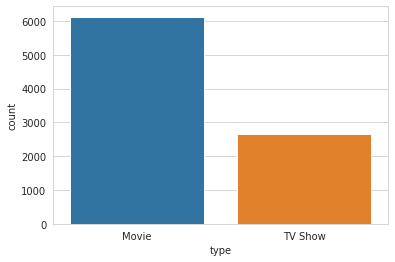

In [ ]:
# plotting countplot of type

sns.countplot(x = 'type' , data = data)

Text(0.5, 1.0, 'Show_types')

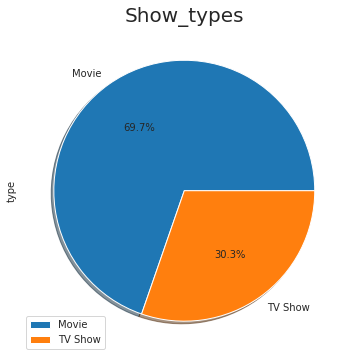

In [ ]:
# plotting pire chart of type of movies

grouping_type.plot.pie(y ='count',autopct = '%.1f%%', shadow = True, legend = 'type' , figsize = (6, 6))
plt.title('Show_types', fontsize = 20)

Observation:: Approximately 69% of movies and 30% of TV shows are present in netflix that means more movies are present, giving evidence that more movies are present in the netflix

In [ ]:
# content ratings distribution on netflix

distribution = data.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(distribution, values='counts', names='rating', 
                  title='Content Ratings distribution on Netflix')
pieChart.show()

In [ ]:
# Netflix availability countries wise

grouping_country = data.groupby(data['country']) ['country'].count()
grouping_country


country
Argentina        76
Australia       114
Austria           9
Bangladesh        3
Belarus           1
               ... 
Uruguay           9
Venezuela         2
Vietnam           7
West Germany      1
Zimbabwe          1
Name: country, Length: 86, dtype: int64

Observation:: 86 countries netflix records are present in data

In [ ]:
# country value counts

data['country'].value_counts()

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

Observation:: Total 86 countries 

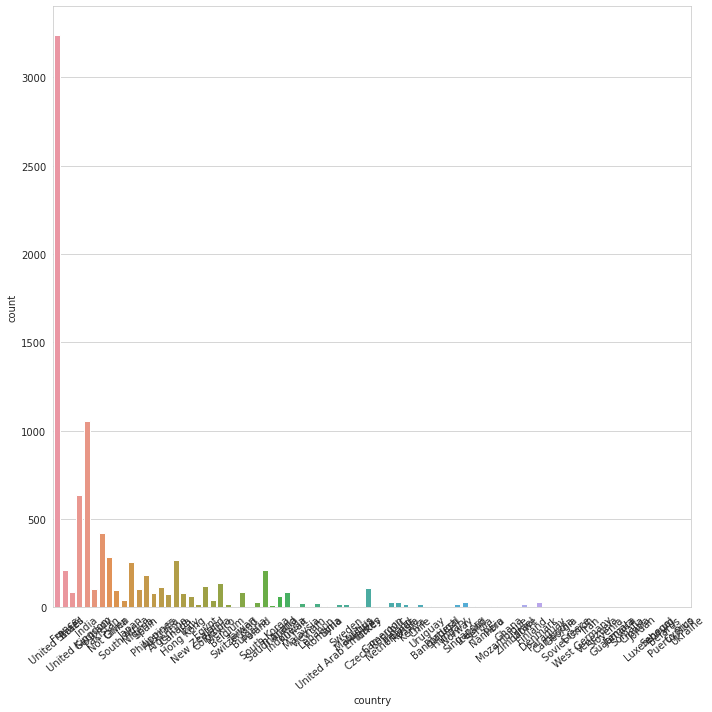

In [ ]:
# plotting ount plot of countries


plt.figure(figsize=(10, 10))
country_count = sns.countplot(x = 'country', data = data,)

country_count.set_xticklabels(country_count.get_xticklabels(), rotation=40)
plt.tight_layout()
plt.show() 

Observation:: cannot interpret too much

In [ ]:
#grouping country and type

grouping_country_type = data.groupby(['country','type']) ['type'].count().reset_index(name = 'type_count')
grouping_country_type

,country,type,type_count
0,Argentina,Movie,56
1,Argentina,TV Show,20
2,Australia,Movie,61
3,Australia,TV Show,53
4,Austria,Movie,8
...,...,...,...
133,Uruguay,TV Show,1
134,Venezuela,Movie,2
135,Vietnam,Movie,7
136,West Germany,Movie,1


Observation:: country wise show types count can be observed 

In [ ]:
# getting information about top 30 countries

top_30countries = grouping_country_type.query("type_count > 80")
top_30countries

,country,type,type_count
15,Canada,Movie,187
16,Canada,TV Show,84
30,Egypt,Movie,109
34,France,Movie,148
47,India,Movie,976
48,India,TV Show,81
49,Indonesia,Movie,84
59,Japan,Movie,87
60,Japan,TV Show,172
72,Mexico,Movie,90


Observation:: United states has more type_count i.e more shows are available in the united states making our conclusion more evident

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

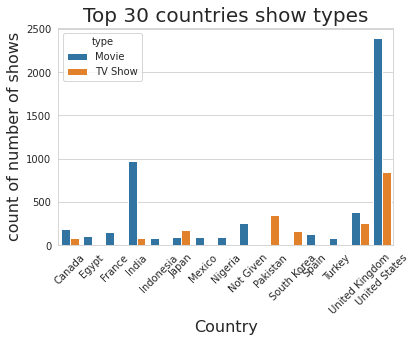

In [ ]:
# bar plot of count of type of show and countries 

sns.barplot(x = top_30countries.reset_index()['country'], y = top_30countries.reset_index()['type_count'],
            hue =  top_30countries.reset_index()['type'])
plt.title('Top 30 countries show types', fontsize = 20)
plt.xlabel('Country', fontsize = 16);
plt.ylabel('count of number of shows', fontsize = 16);
sns.set(rc = {'figure.figsize':(20, 10)})
plt.xticks(rotation = 45)  # to rotate the country names as place will not be sufficient

Observations::
1. More TV shows and movies are available in netflix for the country United states. making our above conclusion correct
2. India  stands at 2nd place for having more movies available in netflix

In [ ]:
# grouping maturity ratings

grouping_rating = data.groupby(data['rating']) ['rating'].count()
grouping_rating

rating
G             41
NC-17          3
NR            79
PG           287
PG-13        490
R            799
TV-14       2157
TV-G         220
TV-MA       3205
TV-PG        861
TV-Y         306
TV-Y7        333
TV-Y7-FV       6
UR             3
Name: rating, dtype: int64

Observation :: 14 maturity rated shows are present in netflix in given data, mostly netflix contains TV-MA type shows or movies, which means most netflix content is for matured people


In [ ]:
#grouping by rating and type

grouping_rating_type = data.groupby(['rating','type']) ['rating'].count().reset_index(name = 'ratings_count')
grouping_rating_type

,rating,type,ratings_count
0,G,Movie,41
1,NC-17,Movie,3
2,NR,Movie,75
3,NR,TV Show,4
4,PG,Movie,287
5,PG-13,Movie,490
6,R,Movie,797
7,R,TV Show,2
8,TV-14,Movie,1427
9,TV-14,TV Show,730


In [ ]:
# filtering only movies data 
movies_rating = grouping_rating_type["type"]=="Movie"
grouping_rating_type.where(movies_rating, inplace = True)
rating_movie= grouping_rating_type.dropna()
rating_movie


,rating,type,ratings_count
0,G,Movie,41.0
1,NC-17,Movie,3.0
2,NR,Movie,75.0
4,PG,Movie,287.0
5,PG-13,Movie,490.0
6,R,Movie,797.0
8,TV-14,Movie,1427.0
10,TV-G,Movie,126.0
12,TV-MA,Movie,2062.0
14,TV-PG,Movie,540.0


Observation :: More TVMA movies are present


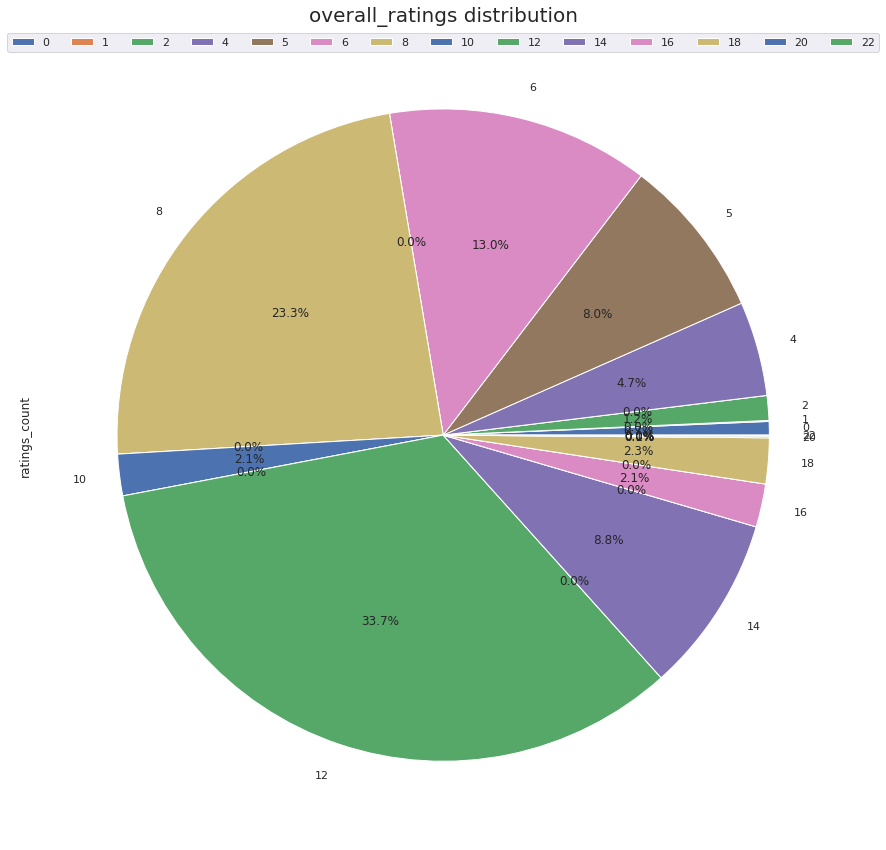

In [ ]:
# plotting pie chart of movie ratings
grouping_rating_type.plot.pie(y='ratings_count',autopct='%.1f%%', figsize=(15,15))
plt.title('overall_ratings distribution', fontsize=20)
plt.legend(ncol=15, loc="upper center")

12 indexed rating i.e TV-MA rated movies are present in more percentage. This provides another support for our statement above, that netflix has movies more to matured people

In [ ]:
# grouping rating and type 

grouping_rating_type1 = data.groupby(['rating','type']) ['rating'].count().reset_index(name = 'ratings_count')
grouping_rating_type1

#filtering only TV show data

tvshow_rating = grouping_rating_type1["type"]=="TV Show"
grouping_rating_type1.where(tvshow_rating, inplace = True)
rating_tvshow= grouping_rating_type1.dropna()
rating_tvshow

,rating,type,ratings_count
3,NR,TV Show,4.0
7,R,TV Show,2.0
9,TV-14,TV Show,730.0
11,TV-G,TV Show,94.0
13,TV-MA,TV Show,1143.0
15,TV-PG,TV Show,321.0
17,TV-Y,TV Show,175.0
19,TV-Y7,TV Show,194.0
21,TV-Y7-FV,TV Show,1.0


Observation::  More TV-MA TV shows are present in the datset.

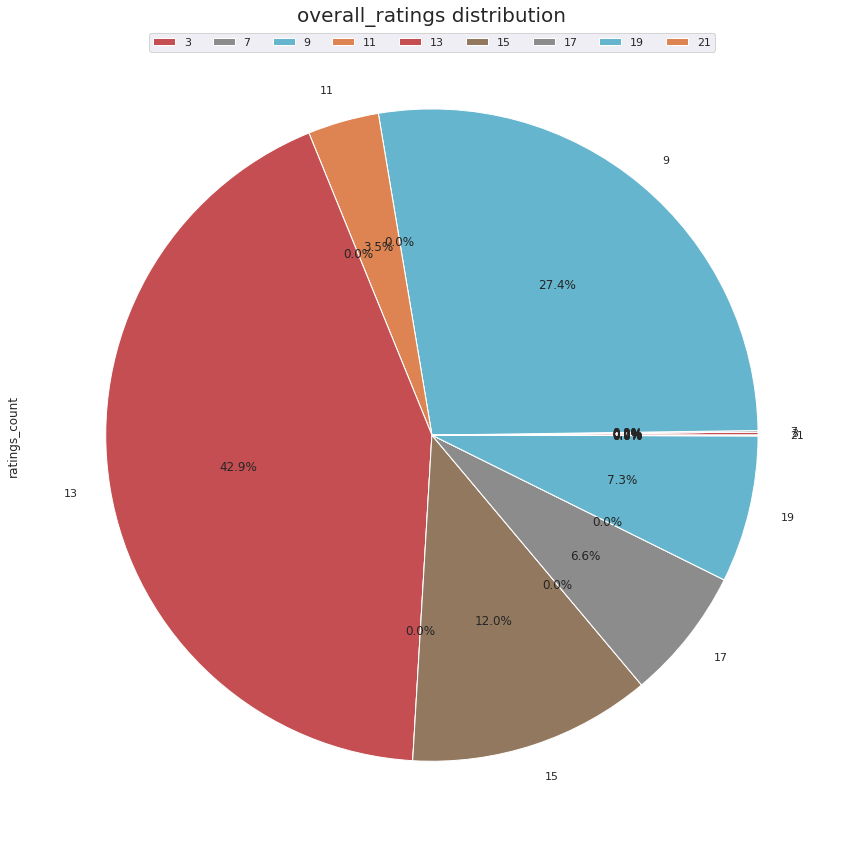

In [ ]:
# plotting pie chart of movie ratings
grouping_rating_type1.plot.pie(y='ratings_count',autopct='%.1f%%', figsize=(15,15))
plt.title('overall_ratings distribution', fontsize=20)
plt.legend(ncol=15, loc="upper center")

Observation:: More TV-MA  rated TV shows are present in the netflix data followed by TV 14

In [ ]:
# counting titles

data['title'].value_counts()

9-Feb                   2
15-Aug                  2
22-Jul                  2
Dick Johnson Is Dead    1
SGT. Will Gardner       1
                       ..
Mercy Black             1
The Trap                1
Pinky Memsaab           1
Love O2O                1
YOM                     1
Name: title, Length: 8787, dtype: int64

observation::  Three movies repeated are 9-feb, 15-aug, 22-jul. original length is 8790

In [ ]:
#Counting duration

duration_count = data.groupby(['duration','type'])[ 'type'].count().reset_index(name = 'duration_count')
duration_count
#filtering to extract top counting 

duration_count.sort_values(by = ['type'], ascending = False)


,duration,type,duration_count
0,1 Season,TV Show,1791
25,12 Seasons,TV Show,2
208,9 Seasons,TV Show,9
196,8 Seasons,TV Show,17
185,7 Seasons,TV Show,23
...,...,...,...
86,171 min,Movie,7
87,172 min,Movie,4
88,173 min,Movie,6
89,174 min,Movie,2


Observation:: 1 season TV shows are  more present in netflix and over 1 and half hour movies count are more in netflix

In [ ]:
# grouping listed in and type

grouping_listedin = data.groupby(['listed_in', 'type']) ['type'].count().reset_index(name = 'show_genre_count')
grouping_listedin

,listed_in,type,show_genre_count
0,Action & Adventure,Movie,128
1,"Action & Adventure, Anime Features",Movie,1
2,"Action & Adventure, Anime Features, Children &...",Movie,4
3,"Action & Adventure, Anime Features, Classic Mo...",Movie,2
4,"Action & Adventure, Anime Features, Horror Movies",Movie,1
...,...,...,...
508,"TV Horror, TV Mysteries, Teen TV Shows",TV Show,1
509,"TV Horror, Teen TV Shows",TV Show,2
510,"TV Sci-Fi & Fantasy, TV Thrillers",TV Show,1
511,TV Shows,TV Show,16


In [ ]:
#getting top 20 genres of netflix

top20_genre = grouping_listedin.query("show_genre_count >= 100").count()
top20_genre

listed_in           22
type                22
show_genre_count    22
dtype: int64

Observation:: We can see more doccumentary movies in the netflix as number is more for doccumentaries

In [ ]:
#plotting count of type of genre 

sns.barplot(x = top20_genre.reset_index()['listed_in'], y = top20_genre.reset_index()['show_genre_count'],
            hue =  top20_genre.reset_index()['type'])
plt.title(' overall_top20_genre', fontsize = 16)
plt.xlabel('listed_in', fontsize = 16);
plt.ylabel('show_genre_count', fontsize = 16);
sns.set(rc = {'figure.figsize':(20, 20)})
plt.xticks(rotation = 65)

KeyError: ignored

Observation:: In TV shows kid's TV genre has more available in netflix, In movies Doccumentaries and dramas, international movies are more in number in netflix

In [ ]:
# grouping directors and type

grouping_directors = data.groupby(['director', 'type']) ['director'].count().reset_index(name = 'type_count')
grouping_directors

,director,type,type_count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
...,...,...,...
4576,Çagan Irmak,Movie,1
4577,Ísold Uggadóttir,Movie,1
4578,Óskar Thór Axelsson,Movie,1
4579,Ömer Faruk Sorak,Movie,2


In [ ]:
#filtering top 5 directors

top5_directors = grouping_directors.query('type_count>= 16')
top5_directors

,director,type,type_count
3100,Not Given,Movie,173
3101,Not Given,TV Show,2415
3432,Rajiv Chilaka,Movie,19
3484,"Raúl Campos, Jan Suter",Movie,18
4092,Suhas Kadav,Movie,16


Observation:: highest cdirected tv shows and movies director name is not given.. insufficient data


In [ ]:
#grouping by month added and type

grouping_month = data.groupby(['month_added', 'type'])['type'].count().reset_index(name = 'released_month')
grouping_month

,month_added,type,released_month
0,April,Movie,549
1,April,TV Show,214
2,August,Movie,518
3,August,TV Show,236
4,December,Movie,547
5,December,TV Show,265
6,February,Movie,382
7,February,TV Show,180
8,January,Movie,545
9,January,TV Show,192


Observation:: Highest movies are released in July.

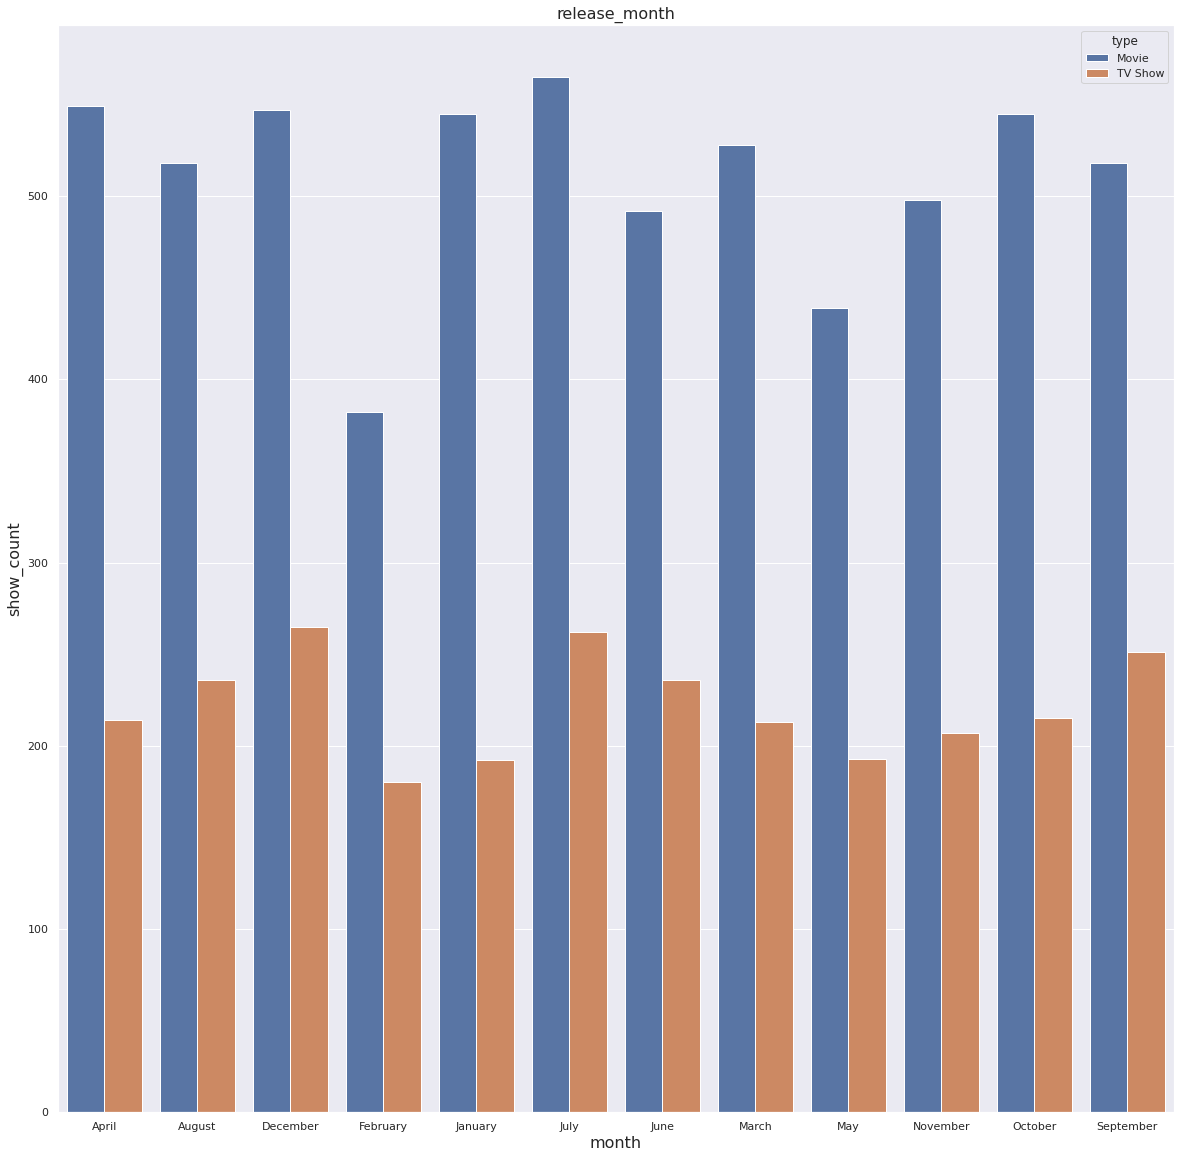

In [ ]:
#plotting month_added and type

sns.barplot(x = grouping_month.reset_index()['month_added'], y = grouping_month.reset_index()['released_month'],
            hue = grouping_month.reset_index()['type']);
plt.title('release_month' , fontsize = 16)
plt.xlabel('month', fontsize = 16);
plt.ylabel('show_count', fontsize = 16);
sns.set(rc = {'figure.figsize':(12, 6)})

Observation:: Almost in all months netflix movies are released, TV shows are mostly released in december and july


In [ ]:
#grouping by year added and type

grouping_year = data.groupby(['year_added', 'type'])['type'].count().reset_index(name = "release_count")
grouping_year

,year_added,type,release_count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


Observation:: in the year 2019 movies are more released but then the count decreased in 2020 and 2021

Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

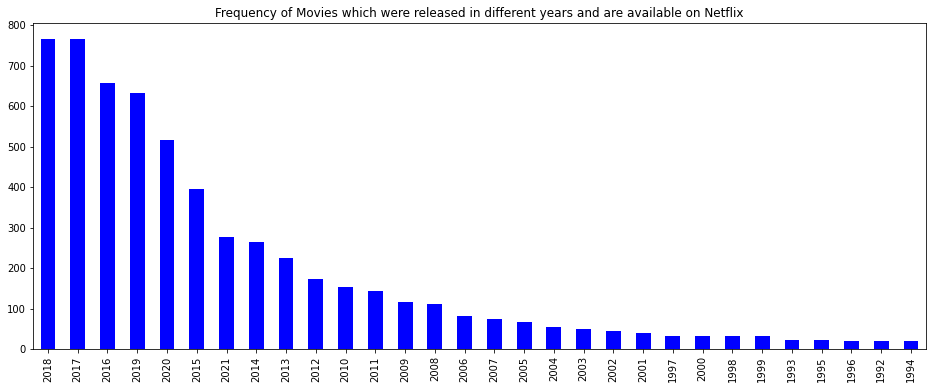

In [ ]:
#Movies released year and availale on netflix

plt.figure(figsize = (16,6))
data[data["type"] == "Movie"]["release_year"].value_counts()[:30].plot(kind = "bar", color = "blue")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

Movies have been gradually increased from 2002 to 2018

Text(0.5, 1.0, 'Frequency of TV shows which were released in different years and are available on Netflix')

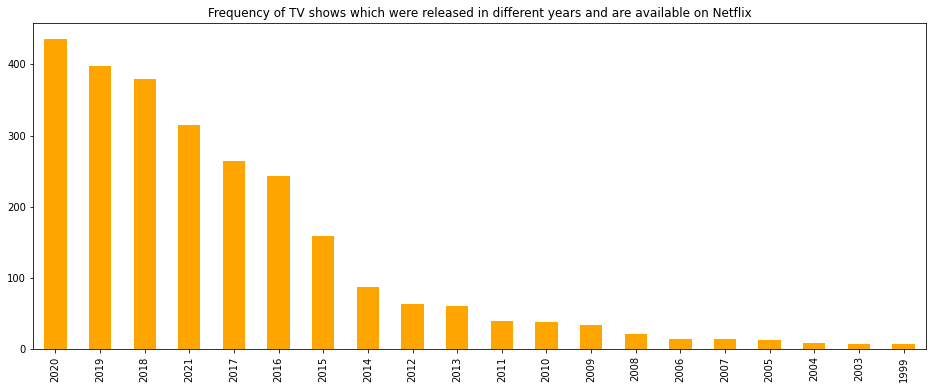

In [ ]:
# TV shows released and available on netflix year wise
data[data["type"] == "TV Show"]["release_year"].value_counts()[:20].plot(kind = "bar",color = "orange")
plt.title("Frequency of TV shows which were released in different years and are available on Netflix")

In [ ]:
#Year wise movies and TV shows  available on netflix

sns.set_style("whitegrid")
line_plot = sns.lineplot(x ="year_added", y ="release_count", hue="type" ,style="type", markers=True, data = grouping_year)
 
# add label to the axis and label to the plot
line_plot.set(xlabel ="year", ylabel = "release_count", title ='release_per_year')

NameError: ignored

Observation:: from the year 2015 raise of netflix movies and Tv shows count has started and this raise went upto 2019


In [ ]:
#grouping by day added and type

grouping_day = data.groupby(['day_added', 'type'])['type'].count().reset_index(name = 'released_day')
grouping_day

,day_added,type,released_day
0,Friday,Movie,1565
1,Friday,TV Show,932
2,Monday,Movie,627
3,Monday,TV Show,223
4,Saturday,Movie,557
5,Saturday,TV Show,259
6,Sunday,Movie,569
7,Sunday,TV Show,182
8,Thursday,Movie,1052
9,Thursday,TV Show,341


Observation:: More movies are released in friday and Thursday. That means near to weekend days

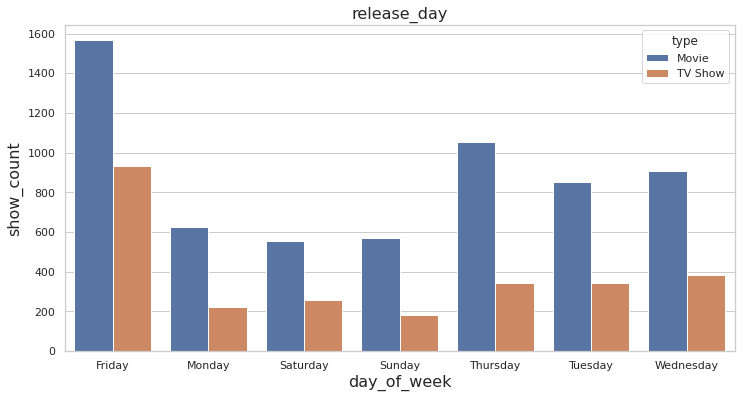

In [ ]:
# plotting release day against count of type of shows
sns.barplot(x = grouping_day.reset_index()['day_added'], y = grouping_day.reset_index()['released_day'],
            hue =  grouping_day.reset_index()['type']);
plt.title('release_day' , fontsize = 16)
plt.xlabel('day_of_week', fontsize = 16);
plt.ylabel('show_count', fontsize = 16);
sns.set(rc = {'figure.figsize':(12, 6)})

Observation:: Less movies and TV shows are released during saturday and sunday


# Insights:

1. Netflix has more number of movies than TV shows
2. Netflix releases  higest number of movies and TV shows in United states followed by more movies in India
3. Netflix has more TV-MA ratings movies and TV shows that means netflix content is mostly for matured people
4. Netflix has more doccumentary genre movies and Kids Tv shows s content
5. Most netflix content is released in months of july and december and netflix produces it's content in all most all months
6. Netflix started keeping more update since 2016 and the peak has continued till 2019
7. Most of the netflix movies are released in Friday